# importation des bibliothèque 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU, LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from tensorflow import nn


In [8]:
# Standardizing the size of all images 
mpl.rcParams['figure.figsize'] = (15,9)
mpl.rcParams['font.size'] = 15

# 1. Exploration des données 

In [11]:
df = pd.read_csv('climat.csv', sep=',')
df.head(10)

,YEAR,MO,DY,WS2M,WD2M,T2M,GWETTOP,PRECTOTCORR,ALLSKY_SFC_PAR_TOT
0,2013,1,1,1.24,58.31,23.40,0.56,0.06,109.10
1,2013,1,2,1.41,49.75,22.98,0.56,0.02,115.24
2,2013,1,3,1.48,67.56,22.97,0.55,0.00,118.47
3,2013,1,4,1.26,102.69,23.21,0.55,0.00,99.50
4,2013,1,5,0.93,249.50,23.38,0.55,0.02,109.19
5,2013,1,6,0.98,306.19,23.32,0.55,0.58,101.45
6,2013,1,7,0.95,125.31,24.09,0.55,0.61,97.85
7,2013,1,8,1.15,26.88,24.86,0.55,0.16,96.95
8,2013,1,9,1.55,60.81,24.03,0.54,0.00,116.49
9,2013,1,10,1.48,112.00,23.87,0.53,0.00,113.23


In [12]:
df.rename(columns={
    'YEAR': 'date',
    'MO': 'mois',
    'DY': 'jour',
    'WS2M': 'vitesse_vent',
    'WD2M': 'direction_vent',
    'T2M': 'temperature',
    'GWETTOP': 'humidite',
    'PRECTOTCORR': 'precipitation',
    'ALLSKY_SFC_PAR_TOT': 'rayonnement_solaire'
}, inplace=True)

df.head(10)

,date,mois,jour,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
0,2013,1,1,1.24,58.31,23.40,0.56,0.06,109.10
1,2013,1,2,1.41,49.75,22.98,0.56,0.02,115.24
2,2013,1,3,1.48,67.56,22.97,0.55,0.00,118.47
3,2013,1,4,1.26,102.69,23.21,0.55,0.00,99.50
4,2013,1,5,0.93,249.50,23.38,0.55,0.02,109.19
5,2013,1,6,0.98,306.19,23.32,0.55,0.58,101.45
6,2013,1,7,0.95,125.31,24.09,0.55,0.61,97.85
7,2013,1,8,1.15,26.88,24.86,0.55,0.16,96.95
8,2013,1,9,1.55,60.81,24.03,0.54,0.00,116.49
9,2013,1,10,1.48,112.00,23.87,0.53,0.00,113.23


In [14]:
df['dates'] = pd.to_datetime(df['jour'].astype(str) + '-' + 
                              df['mois'].astype(str) + '-' + 
                              df['date'].astype(str), 
                              format='%d-%m-%Y', 
                              errors='coerce')
df.head(10)

,date,mois,jour,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire,dates
0,2013,1,1,1.24,58.31,23.40,0.56,0.06,109.10,2013-01-01
1,2013,1,2,1.41,49.75,22.98,0.56,0.02,115.24,2013-01-02
2,2013,1,3,1.48,67.56,22.97,0.55,0.00,118.47,2013-01-03
3,2013,1,4,1.26,102.69,23.21,0.55,0.00,99.50,2013-01-04
4,2013,1,5,0.93,249.50,23.38,0.55,0.02,109.19,2013-01-05
5,2013,1,6,0.98,306.19,23.32,0.55,0.58,101.45,2013-01-06
6,2013,1,7,0.95,125.31,24.09,0.55,0.61,97.85,2013-01-07
7,2013,1,8,1.15,26.88,24.86,0.55,0.16,96.95,2013-01-08
8,2013,1,9,1.55,60.81,24.03,0.54,0.00,116.49,2013-01-09
9,2013,1,10,1.48,112.00,23.87,0.53,0.00,113.23,2013-01-10


In [23]:
df.drop(columns=['date', 'mois', 'jour'], inplace=True, errors='ignore')
df.head(10)

,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire,dates
0,1.24,58.31,23.40,0.56,0.06,109.10,2013-01-01
1,1.41,49.75,22.98,0.56,0.02,115.24,2013-01-02
2,1.48,67.56,22.97,0.55,0.00,118.47,2013-01-03
3,1.26,102.69,23.21,0.55,0.00,99.50,2013-01-04
4,0.93,249.50,23.38,0.55,0.02,109.19,2013-01-05
5,0.98,306.19,23.32,0.55,0.58,101.45,2013-01-06
6,0.95,125.31,24.09,0.55,0.61,97.85,2013-01-07
7,1.15,26.88,24.86,0.55,0.16,96.95,2013-01-08
8,1.55,60.81,24.03,0.54,0.00,116.49,2013-01-09
9,1.48,112.00,23.87,0.53,0.00,113.23,2013-01-10


In [24]:
# mettre la date comme premier colonne dans notre dataset
cols = ['dates'] + [col for col in df if col != 'dates']
df = df[cols]
df.head(10)

,dates,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
0,2013-01-01,1.24,58.31,23.40,0.56,0.06,109.10
1,2013-01-02,1.41,49.75,22.98,0.56,0.02,115.24
2,2013-01-03,1.48,67.56,22.97,0.55,0.00,118.47
3,2013-01-04,1.26,102.69,23.21,0.55,0.00,99.50
4,2013-01-05,0.93,249.50,23.38,0.55,0.02,109.19
5,2013-01-06,0.98,306.19,23.32,0.55,0.58,101.45
6,2013-01-07,0.95,125.31,24.09,0.55,0.61,97.85
7,2013-01-08,1.15,26.88,24.86,0.55,0.16,96.95
8,2013-01-09,1.55,60.81,24.03,0.54,0.00,116.49
9,2013-01-10,1.48,112.00,23.87,0.53,0.00,113.23


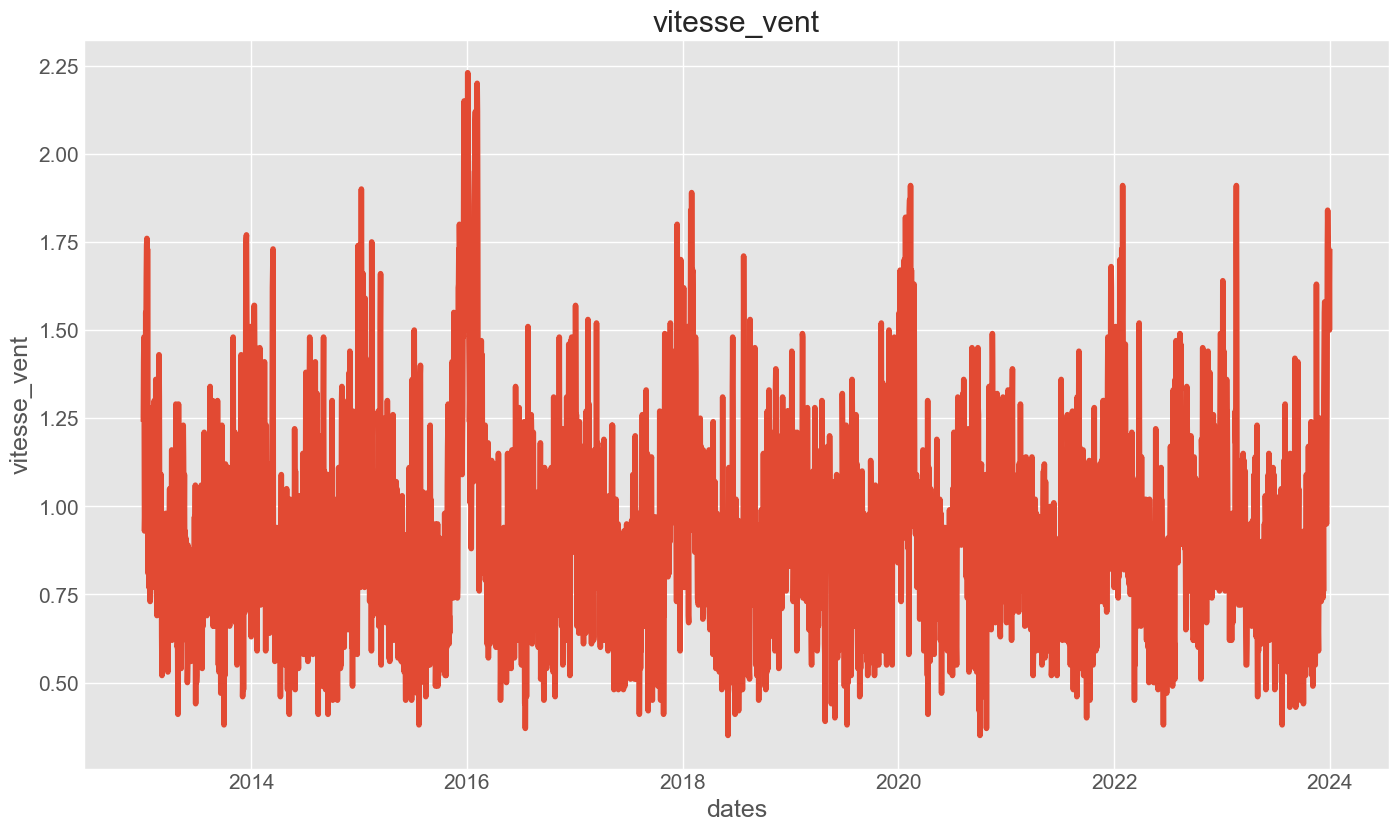

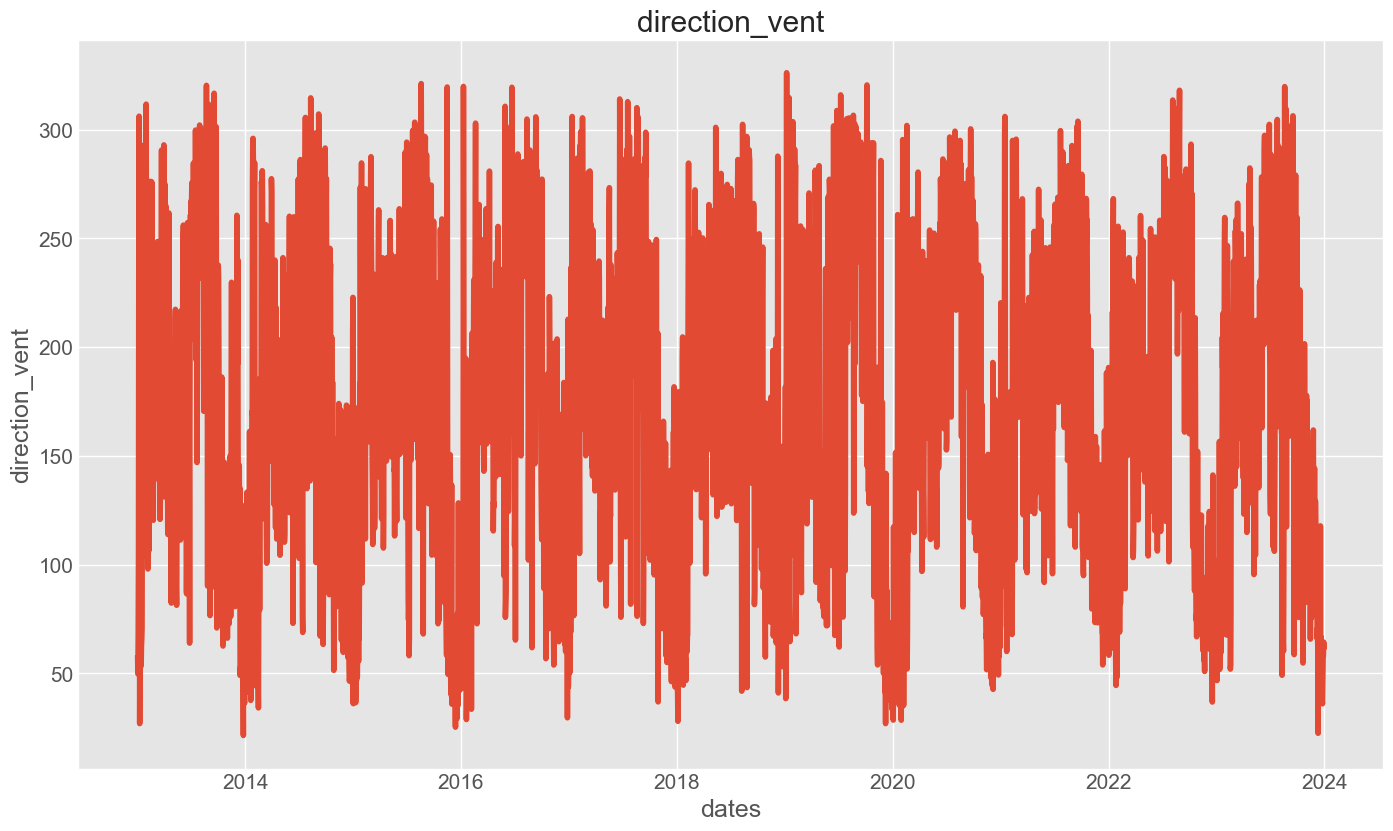

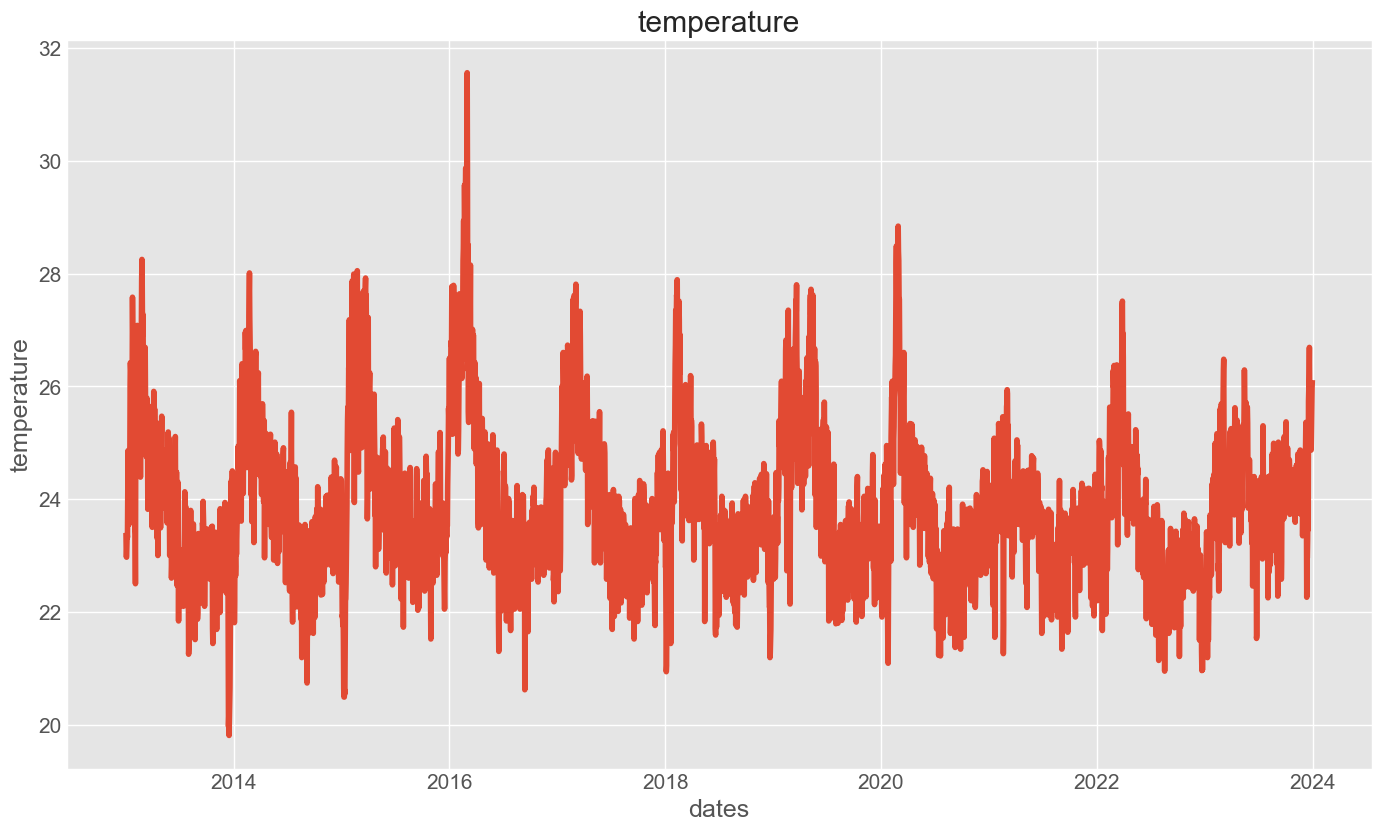

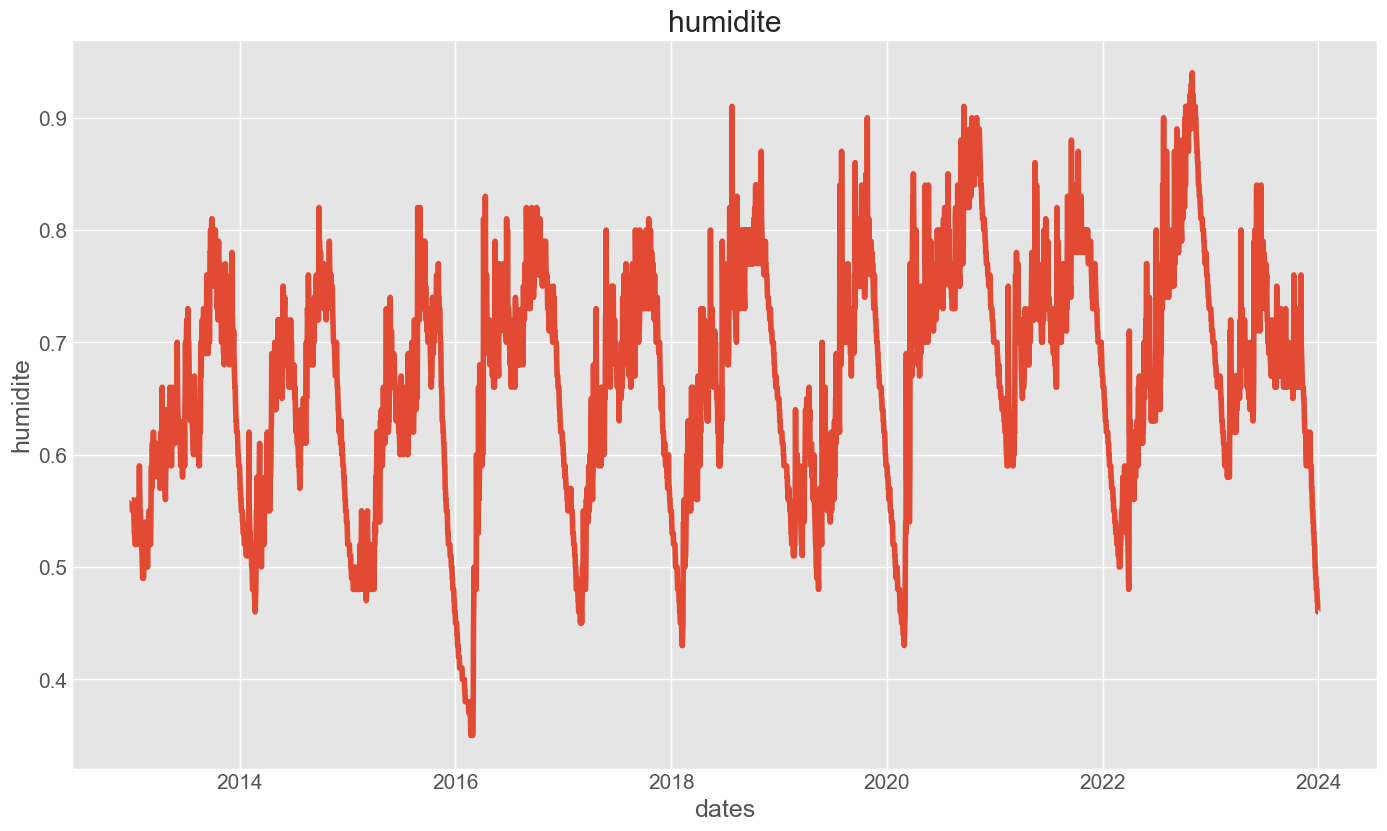

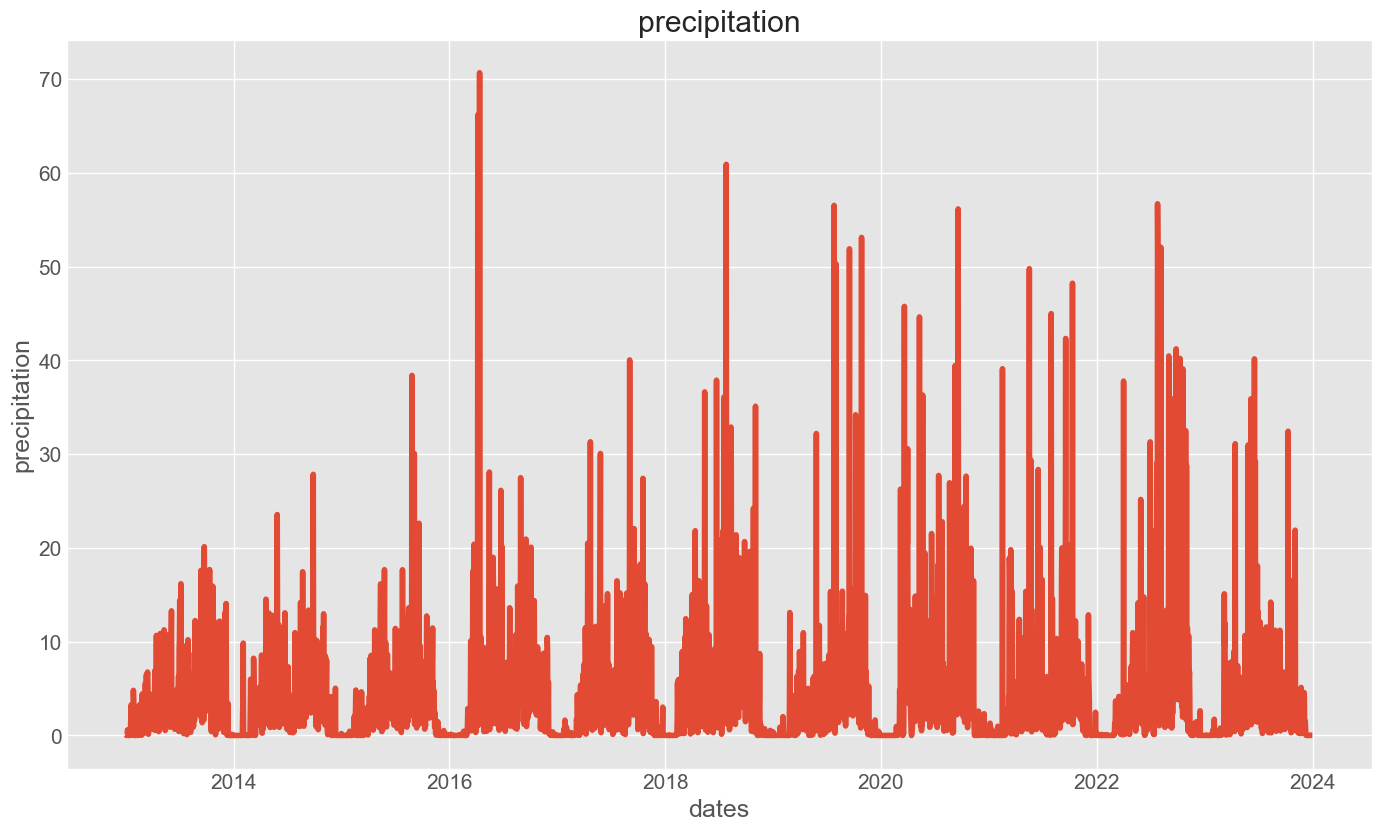

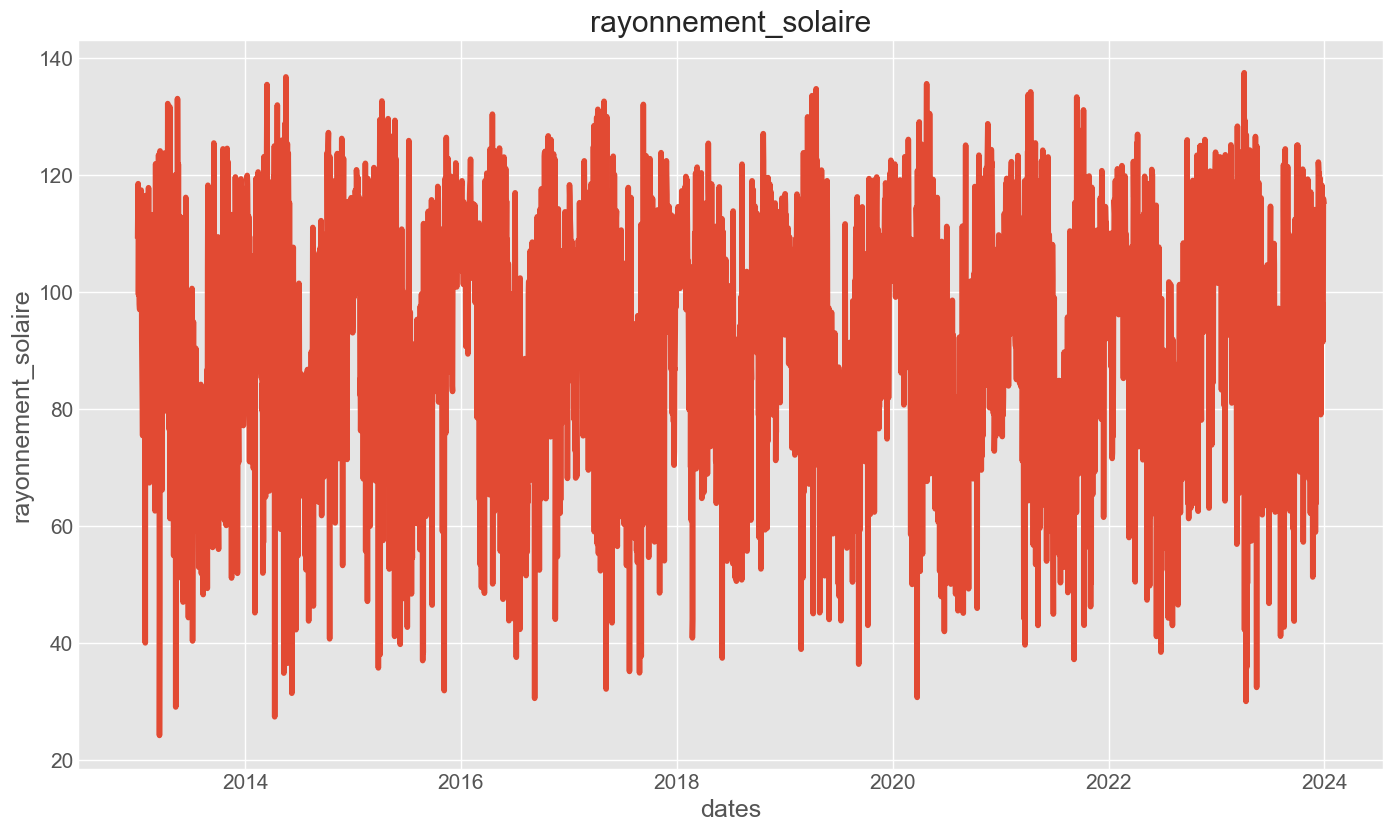

In [ ]:
# visualisation de tout les variables
columns = df.drop(columns=['dates']).columns
for column in columns:
    sns.lineplot(x=df['dates'], y=df[column])
    plt.title(column)
    plt.show()

In [29]:
missing_values = df.isnull().sum()
print(missing_values)

dates                  0
vitesse_vent           0
direction_vent         0
temperature            0
humidite               0
precipitation          0
rayonnement_solaire    0
dtype: int64


In [30]:
#statistique sur nos données 
df.describe()

,dates,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
count,4017,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000
mean,2018-07-02 00:00:00,0.917404,173.356871,23.903079,0.665721,4.036527,92.499925
min,2013-01-01 00:00:00,0.350000,21.440000,19.810000,0.350000,0.000000,24.160000
25%,2015-10-02 00:00:00,0.720000,117.310000,23.030000,0.590000,0.250000,78.450000
50%,2018-07-02 00:00:00,0.880000,174.060000,23.710000,0.680000,2.170000,94.850000
75%,2021-04-01 00:00:00,1.060000,232.880000,24.590000,0.740000,5.260000,107.740000
max,2023-12-31 00:00:00,2.230000,326.190000,31.560000,0.940000,70.680000,137.430000
std,NaN,0.272967,70.914221,1.316113,0.101981,6.228387,19.676253


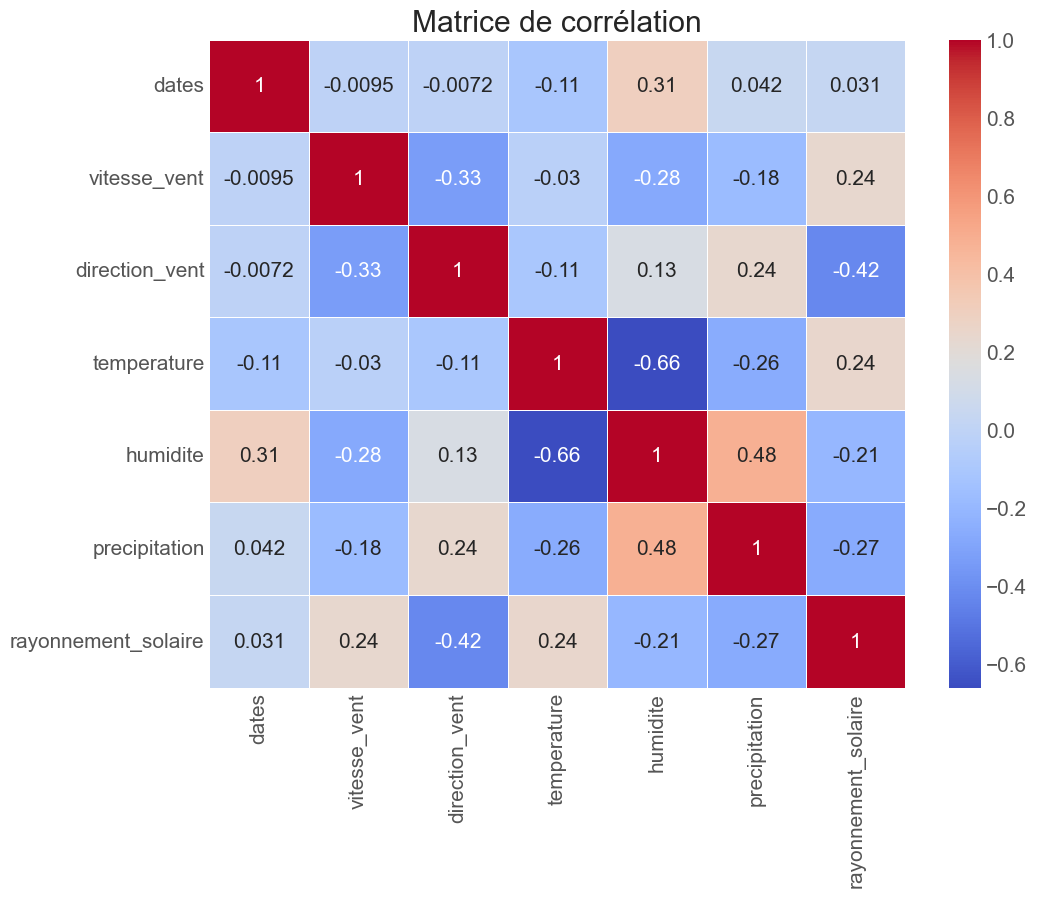

In [31]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

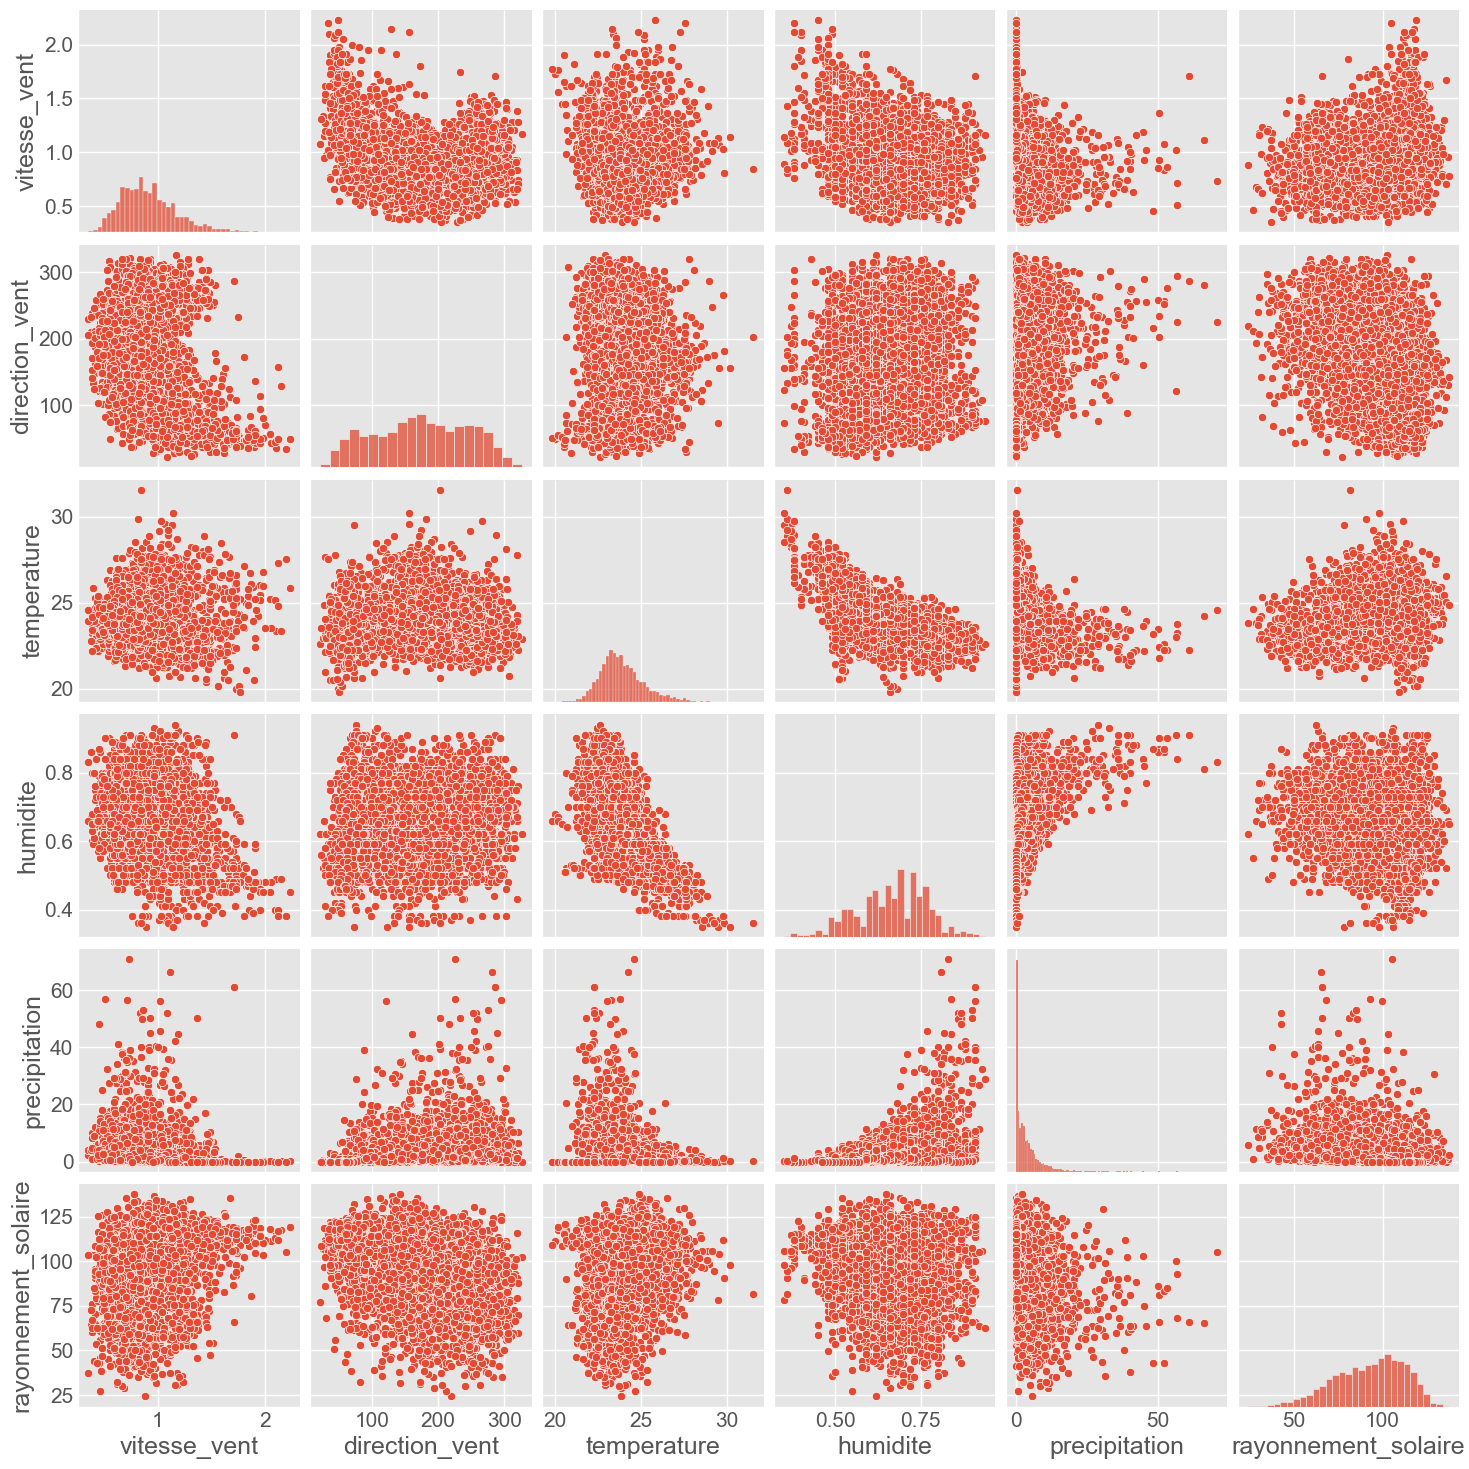

                     vitesse_vent  direction_vent  temperature  humidite  \
vitesse_vent             1.000000       -0.331147    -0.030319 -0.278776   
direction_vent          -0.331147        1.000000    -0.106908  0.133184   
temperature             -0.030319       -0.106908     1.000000 -0.662040   
humidite                -0.278776        0.133184    -0.662040  1.000000   
precipitation           -0.179068        0.235453    -0.259705  0.484655   
rayonnement_solaire      0.236927       -0.422825     0.240906 -0.205287   

                     precipitation  rayonnement_solaire  
vitesse_vent             -0.179068             0.236927  
direction_vent            0.235453            -0.422825  
temperature              -0.259705             0.240906  
humidite                  0.484655            -0.205287  
precipitation             1.000000            -0.271028  
rayonnement_solaire      -0.271028             1.000000  


In [32]:
# Tracer des graphiques de dispersion pour chaque paire de variables
sns.pairplot(df[columns])
plt.show()

# Calculer les coefficients de corrélation
correlation_matrix = df[columns].corr()
print(correlation_matrix)

In [34]:
def create_window(target, feature, window=1, offset=0):
    feature_new, target_new = [], []
    feature_np = feature.to_numpy()
    target_np = target.to_numpy()
    for i in range(window, target.shape[0] - offset):
        feature_list = feature_np[i - window:i]
        feature_new.append(feature_list.reshape(window, feature_np.shape[1]))
        target_new.append(target_np[i+offset].reshape(1))
    return np.array(feature_new), np.array(target_new)

## transormaation des données avec la méthode standardScaler

In [38]:
# mettre à l'échelle tout l'ensemble de données (sans compter la date)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns='dates'))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(columns='dates').columns)

#Régler la fenêtre à 10
window =10
feature_columns = ['vitesse_vent', 'direction_vent', 'temperature', 'humidite', 'rayonnement_solaire']

feature, target = create_window(df_scaled['precipitation'],df_scaled[feature_columns], window=window)
print(feature[0])
print(target[0])
print(df_scaled.head(12))


[[ 1.18196141 -1.62254047 -0.38229405 -1.03680397  0.8437654 ]
 [ 1.80482452 -1.74326471 -0.7014554  -1.03680397  1.15585554]
 [ 2.06129757 -1.49208495 -0.70905448 -1.13487408  1.32003325]
 [ 1.25523942 -0.99663604 -0.52667657 -1.13487408  0.35580688]
 [ 0.0461522   1.07386935 -0.39749221 -1.13487408  0.84834002]
 [ 0.22934723  1.87338539 -0.44308669 -1.13487408  0.45492346]
 [ 0.11943021 -0.6776194   0.14204244 -1.13487408  0.27193901]
 [ 0.85221034 -2.06580717  0.72717158 -1.13487408  0.2261929 ]
 [ 2.31777061 -1.58728222  0.09644797 -1.23294419  1.21939181]
 [ 2.06129757 -0.86533432 -0.02513731 -1.33101431  1.05368923]]
[-0.64816614]
    vitesse_vent  direction_vent  temperature  humidite  precipitation  \
0       1.181961       -1.622540    -0.382294 -1.036804      -0.638532   
1       1.804825       -1.743265    -0.701455 -1.036804      -0.644955   
2       2.061298       -1.492085    -0.709054 -1.134874      -0.648166   
3       1.255239       -0.996636    -0.526677 -1.134874    

In [39]:
feature.shape

(4007, 10, 5)

In [40]:
target.shape

(4007, 1)

## Séparation du dataset en tarin et set 

In [59]:
#Fonction qui separe les données en entraînement et test avec la taille de train à 80
def train_test(feature, target, perc_train = 0.7):
    size_train = int(len(feature) * perc_train)

    x_train = feature[0:size_train]
    y_train = target[0:size_train]

    x_test = feature[size_train: len(feature)]
    y_test = target[size_train: len(feature)]

    return x_train, x_test, y_train, y_test

# Prédiction des précipitation

In [60]:
def model_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape, activation= 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    optimizer = optimizers.Adam()
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

# Exemple d'utilisation
input_shape = (x_shape[1], x_shape[2])
model = model_lstm(input_shape)
model.summary()

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 10, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10, 1)          │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

# Définir un callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Surveiller la perte sur les données de validation
    patience=5,          # Arrêter après 5 epochs sans amélioration
    restore_best_weights=True  # Restaurer les poids du meilleur modèle
)

# Entraîner le modèle avec Early Stopping
result = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping]  # Ajouter le callback ici
)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.9480 - val_loss: 1.1133
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8816 - val_loss: 1.1073
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7889 - val_loss: 1.0989
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8250 - val_loss: 1.1040
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8511 - val_loss: 1.1010
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8659 - val_loss: 1.0955
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7698 - val_loss: 1.0897
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7612 - val_loss: 1.0925
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9287 - val_loss: 1.0948
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9423 - val_loss: 1.1000
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9552 - val_loss: 1.0963
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8

In [62]:
# Function to print the results of the fit process
def print_loss(result):
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

# Function to print the y_predicted compared with the y_test
def print_test_x_prediction(y_test, y_predict, df_date, train_size, window=0):
    sns.lineplot(x=df_date.iloc[train_size + window:], y=y_test[:,0], label = 'Test')
    sns.lineplot(x=df_date.iloc[train_size + window:], y=y_predict[:,0], label = 'Predict')
    plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


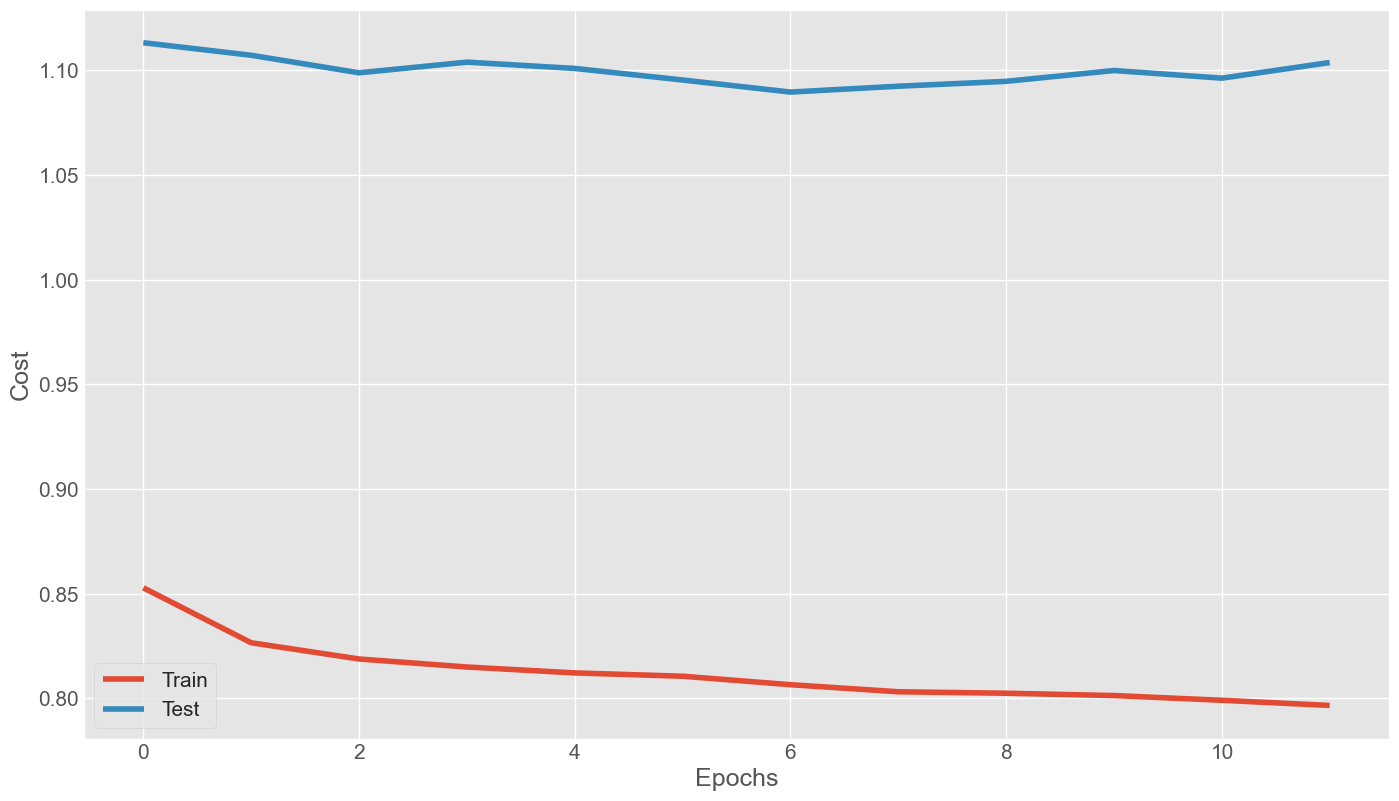

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [64]:
y_predict = model.predict(x_test).reshape(-1)
y_test = y_test.reshape(-1)

print_loss(result)
print_test_x_prediction(y_test, y_predict, df['dates'], len(y_train), window=window)